### CruiseMaps with Data

In [37]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

#using xarray for bathymetry data read
import xarray as xa
import pandas as pd

extent=[-167.5, -150, 52.5, 60]

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 
bathy_sub = bathy.sel(latitude=slice(extent[3],extent[2]),longitude=slice(extent[0],extent[1]))

#bathy_sub.topo.plot(cmap=cmocean.cm.gray)

In [38]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [43]:
path = '/Users/bell/ecoraid/2019/CTDcasts/dy1905/working/'
data = pd.read_csv(path + 'bottom.csv')
loc = pd.read_csv(path + 'location.csv')

loc['latitude'] = loc['lat']+loc['latdm']/60
loc['longitude'] = -1 * loc['lon']+loc['londm']/60

In [26]:
merged_data = pd.concat([data,loc],axis=1)

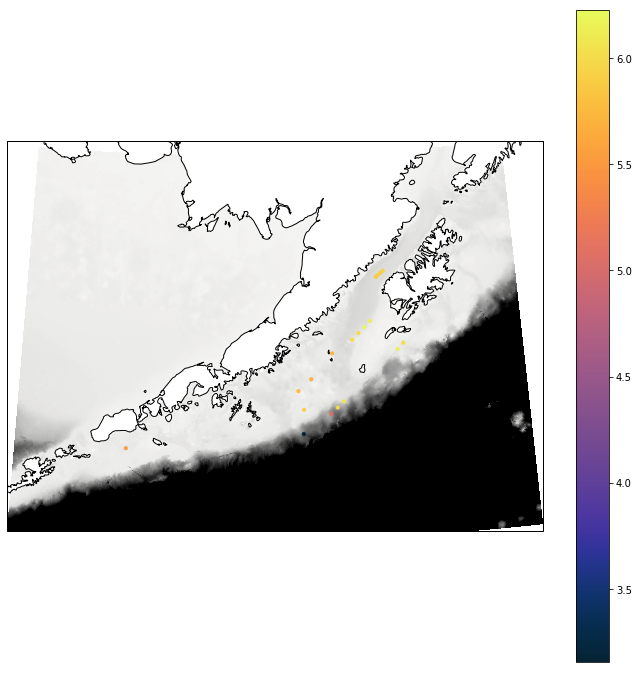

In [39]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, 
              bathy_sub.topo, cmap=cmocean.cm.gray,
              vmin=-3000,vmax=100,
              transform=transformation)
c = ax.scatter(merged_data.longitude, merged_data.latitude, s=10,
                               c=merged_data.t090C, cmap=cmocean.cm.thermal,
                               transform=transformation)
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)
        

fig.savefig('DY1905_BTMtemp.png',dpi=300)

In [44]:
merged_data.to_csv(path + 'bottom_wlocation.csv')
merged_data

,Pressure [dbar],c0mS/cm,c1mS/cm,flECO-AFL,sbeox0V,t090C,t190C,timeS,sbeox1V,par,...,sbox1Mm/Kg,sbeox1PS,nbin,flag,lat,latdm,lon,londm,latitude,longitude
ctd001,65.0,31.390061,31.392158,0.2366,2.3547,5.5460,5.5467,189.558,2.3421,0.21460,...,287.812,92.791,15.0,False,54,17.34,164,15.28,54.289000,-163.745333
ctd002,844.0,31.614987,31.616168,0.0226,0.5951,3.1549,3.1556,1054.459,0.5837,0.21460,...,13.942,4.317,38.0,False,54,35.73,158,16.15,54.595500,-157.730833
ctd003,103.0,32.009056,32.009672,0.1265,2.2896,5.9286,5.9289,229.296,2.2735,0.21431,...,276.186,90.052,17.0,False,55,4.43,158,17.80,55.073833,-157.703333
ctd004,112.0,31.680553,31.681436,0.0871,2.2853,5.6837,5.6842,413.159,2.2689,0.21460,...,276.203,89.451,48.0,False,55,40.07,158,34.39,55.667833,-157.426833
ctd005,116.0,32.053203,32.054028,0.0404,2.1342,5.7762,5.7765,282.310,2.1204,0.21459,...,251.785,81.919,36.0,False,55,26.56,158,7.29,55.442667,-157.878500
ctd006,75.0,32.105912,32.106862,0.3307,2.4030,6.0797,6.0799,201.382,2.3857,0.21460,...,289.847,94.825,51.0,False,55,12.71,157,40.67,55.211833,-156.322167
ctd007,79.0,31.978530,31.984974,0.2040,2.3132,5.9945,5.9950,184.733,2.2958,0.21460,...,276.955,90.390,3.0,False,55,5.80,157,27.14,55.096667,-156.547667
ctd008,289.0,32.649193,32.650178,0.0305,1.0279,5.0540,5.0557,687.648,1.0145,0.21460,...,81.336,26.271,9.0,False,54,58.67,157,13.62,54.977833,-156.773000
ctd009,145.0,31.650374,31.651088,0.0845,2.2800,5.7277,5.7281,335.684,2.2667,0.21460,...,277.153,89.789,31.0,False,56,9.60,157,19.47,56.160000,-156.675500
ctd010,52.0,31.936004,31.937613,0.3299,2.4373,6.1654,6.1662,115.476,2.4219,1.29140,...,294.590,96.386,2.0,False,56,11.11,155,37.27,56.185167,-154.378833
